In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define the model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', accuracy)

Epoch 1/5
422/422 [==============================] - 24s 54ms/step - loss: 0.2289 - accuracy: 0.9352 - val_loss: 0.0748 - val_accuracy: 0.9798
Epoch 2/5
422/422 [==============================] - 21s 50ms/step - loss: 0.0699 - accuracy: 0.9793 - val_loss: 0.0648 - val_accuracy: 0.9805
Epoch 3/5
422/422 [==============================] - 21s 50ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0547 - val_accuracy: 0.9852
Epoch 4/5
422/422 [==============================] - 21s 50ms/step - loss: 0.0343 - accuracy: 0.9899 - val_loss: 0.0478 - val_accuracy: 0.9872
Epoch 5/5
422/422 [==============================] - 21s 50ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.0493 - val_accuracy: 0.9875
Test accuracy: 0.9854999780654907


Data Loading: Loads the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits.

Preprocessing: Reshapes the input images and scales the pixel values to be between 0 and 1.

Model Architecture: Defines a simple convolutional neural network (CNN) model with two convolutional layers followed by max-pooling, flattening, and two fully connected (dense) layers.

Compilation: Compiles the model with categorical cross-entropy loss and the Adam optimizer.

Training: Trains the model on the training data for 5 epochs with a batch size of 128 and 10% validation split.

Evaluation: Evaluates the trained model on the test data and prints the test accuracy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Choose a random sample from the test set
sample_index = np.random.randint(0, len(x_test))
sample_image = x_test[sample_index]
sample_label = np.argmax(y_test[sample_index])

In [ ]:
# Reshape the sample image to match the model input shape
sample_image = sample_image.reshape(1, 28, 28, 1)

In [ ]:
# Make predictions on the sample image
predictions = model.predict(sample_image)
predicted_label = np.argmax(predictions)

1/1 [==============================] - 0s 89ms/step


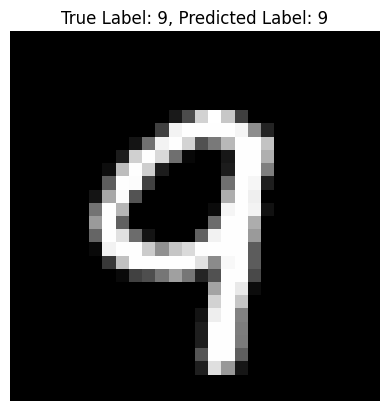

In [ ]:
# Display the sample image and prediction
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {sample_label}, Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()